# Introduction to Python for Data Visualization
DSSG Conference 2017 <br/>
Alex C. Engler

## Introduction

In this module, you will learn to quickly and flexibly make a wide series of visualizations for exploratory data analysis and communicating to your audience. This module contains a practical introduction to data visualization in Python and covers important rules that any data visualizer should follow.

## The Data is Available Here: http://bit.ly/2wZEHD5

## Learning Objectives

* Learn critical rules about data visualization (using the correct graph types, correctly labeling all visual encodings, properly sourcing data).

* Become familiar with a core base of data visualization tools in Python - specifically matplotlib and seaborn.

* Start to develop the ability to conceptualize what visualizations are going to best reveal various types of patterns in your data.

* Learn more about Illinois administrative data with exploratory analyses.

In [156]:
# Import packages:
import pandas as pd

import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns

# so images get plotted in the notebook
%matplotlib inline

In [157]:
# Read in the Data
# Department of Transportation's (DoT) Fatality Accident Reporting System (FARS) Data:

acc = pd.read_csv("./fars.csv")
acc.shape

(62222, 58)

## About This Data

Traffic fatalities are on the rise in the United States. 40,200 people died in 2016 due to motor vehicle accidents, [according to the National Safety Council](http://www.nsc.org/NewsDocuments/2017/12-month-estimates.pdf). This is a 14 percent increase in the last two years, and the state of [Illinois is fairing even worse](http://www.chicagotribune.com/news/local/breaking/ct-illinois-traffic-deaths-increase-0815-20170814-story.html).

Various experts attribute this increases to distracted driving, more speeding, lax enforcement of seatbelt laws, and a better economy (leading to more driving), but there is little consensus. Even before the dire 2016 numbers, the Obama White House and DoT even [issued a call to action](https://obamawhitehouse.archives.gov/blog/2016/08/29/2015-traffic-fatalities-data-has-just-been-released-call-action-download-and-analyze) to analyze this data and help mitigate the problem. 

In [158]:
# Each row of data is one fatal accident in 2014 or 2015.
# Look at column names to see what information is available:
list(acc)

['Unnamed: 0',
 'StateName',
 'CountyName',
 'StateFIPSCode',
 'CountyFIPSCode',
 'STATE',
 'ST_CASE',
 'VE_TOTAL',
 'VE_FORMS',
 'PVH_INVL',
 'PEDS',
 'PERNOTMVIT',
 'PERMVIT',
 'PERSONS',
 'COUNTY',
 'CITY',
 'DAY',
 'MONTH',
 'YEAR',
 'DAY_WEEK',
 'HOUR',
 'MINUTE',
 'NHS',
 'RUR_URB',
 'FUNC_SYS',
 'RD_OWNER',
 'ROUTE',
 'TWAY_ID',
 'TWAY_ID2',
 'MILEPT',
 'LATITUDE',
 'LONGITUD',
 'SP_JUR',
 'HARM_EV',
 'MAN_COLL',
 'RELJCT1',
 'RELJCT2',
 'TYP_INT',
 'WRK_ZONE',
 'REL_ROAD',
 'LGT_COND',
 'WEATHER1',
 'WEATHER2',
 'WEATHER',
 'SCH_BUS',
 'RAIL',
 'NOT_HOUR',
 'NOT_MIN',
 'ARR_HOUR',
 'ARR_MIN',
 'HOSP_HR',
 'HOSP_MN',
 'CF1',
 'CF2',
 'CF3',
 'FATALS',
 'DRUNK_DR',
 'ROAD_FNC']

In [83]:
## Look at the first 10 rows
print(acc)

       Unnamed: 0 StateName  CountyName  StateFIPSCode  CountyFIPSCode  STATE  \
0               1   Alabama      Walker              1             127      1   
1               2   Alabama   Limestone              1              83      1   
2               3   Alabama     Bullock              1              11      1   
3               4   Alabama        Dale              1              45      1   
4               5   Alabama        Dale              1              45      1   
5               6   Alabama    Randolph              1             111      1   
6               7   Alabama     Madison              1              89      1   
7               8   Alabama   Jefferson              1              73      1   
8               9   Alabama      Shelby              1             117      1   
9              10   Alabama     Colbert              1              33      1   
10             11   Alabama   Limestone              1              83      1   
11             12   Alabama 

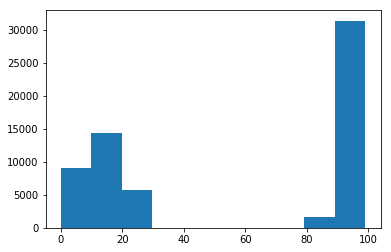

In [40]:
# Data Visuaulzation can reveal errors in our data:
plt.hist(acc.ARR_HOUR)
plt.show()

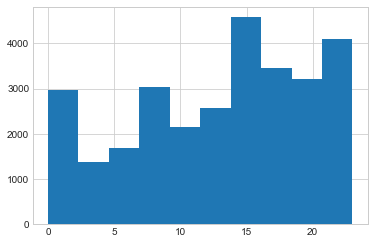

In [159]:
acc_lim = acc[(acc.ARR_HOUR < 80)]

plt.hist(acc_lim.ARR_HOUR)
plt.show()

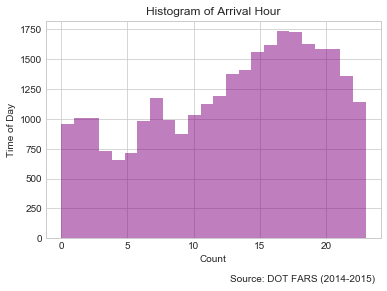

In [160]:
## We can change options within the hist function (e.g. number of bins, color, transparency:
plt.hist(acc_lim.ARR_HOUR, bins=24, facecolor="purple", alpha=0.5)

## And we can affect the plot options too:
plt.title ('Histogram of Arrival Hour')
plt.xlabel('Count')
plt.ylabel('Time of Day')

## And add Data sourcing:
### xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: DOT FARS (2014-2015)', xy=(0.55,-0.2), xycoords="axes fraction")

## We use plt.show() to display the graph once we are done setting options:
plt.show()

### A Note on Data Sourcing

Data sourcing is a critical aspect of any data visualization. Although here we are simply referencing the agencies that created the data, it is ideal to provide as direct of a path as possible for the viewer to find the data the graph is based on. When this is not possible (e.g. the data is sequestered), directing the viewer to documentation or methodology for the data is a good alternative. Regardless, providing clear sourcing for the underlying data is an **absolutely requirement** of any respectable visualization, and further builds trusts and enables reproducibility.

In [161]:
acc_lim.RUR_URB.value_counts()

1.0    7657
2.0    6094
8.0     603
6.0      37
9.0      13
Name: RUR_URB, dtype: int64

### Layering in Matplotlib
This functionality - where we can make consecutive changes to the same plot - also allows us to layer on multiple plots. By default, the first graph you create will be at the bottom, with ensuing graphs on top.

Below, we see the 2005 histogram, in blue, is beneath the 2015 histogram, in orange. You might also notice that the distribution of income for offenders has shifted over that ten year period.

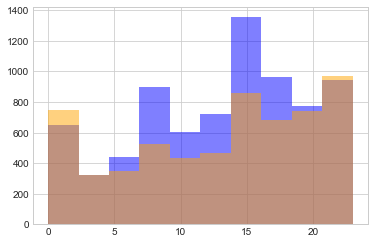

In [162]:
plt.hist(acc_lim[acc_lim["RUR_URB"] == 1].ARR_HOUR, facecolor="blue", alpha=0.5)
plt.hist(acc_lim[acc_lim["RUR_URB"] == 2].ARR_HOUR, facecolor="orange", alpha=0.5)
plt.show()

### Our First Chart in seaborn

Below, we quickly use pandas to create an aggregation of our wages data - the average wages by year. Then we pass the data to the barplot function in the `seaborn` function, which recall we imported as `sns` for short.

In [73]:
agg = acc.groupby(['YEAR'])['FATALS'].sum().reset_index()
agg.head(10)

,YEAR,FATALS
0,2014,32744
1,2015,35092


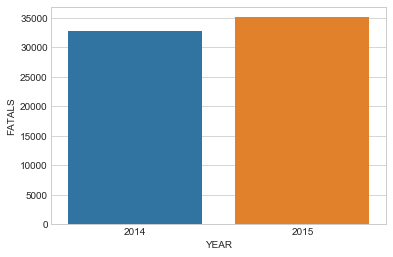

In [163]:
## Barplot function

# Seaborn's set_style function allows us to set many aesthetic parameters.
sns.set_style("whitegrid")

# Note we can reference column names (in quotes) in the specified data:
sns.barplot(data=agg, x='YEAR', y='FATALS')
plt.show()

## Choosing a Data Visualization Package

There are many excellent data visualiation modules available in Python, but for the tutorial we will stick to the tried and true combination of `matplotlib` and `seaborn`. You can read more about different options for data visualization in Python in the [More Resources](#More-Resources:) section at the bottom of this notebook. 

`matplotlib` is very expressive, meaning it has functionality that can easily account for fine-tuned graph creation and adjustment. However, this also means that `matplotlib` is somewhat more complex to code.

`seaborn` is a higher-level visualization module, which means it is much less expressive and flexible than matplotlib, but far more concise and easier to code.

It may seem like we need to choose between these two approaches, but this is not the case! Since `seaborn` is itself written in `matplotlib` (you will sometimes see `seaborn` be called a `matplotlib` 'wrapper'), we can use `seaborn` for making graphs quickly and then `matplotlib` for specific adjustments. When you see `plt` referenced in the code below, we are using `matplotlib`'s pyplot submodule.


`seaborn` also improves on `matplotlib` in important ways, such as the ability to more easily visualize regression model results, creating small multiples, enabling better color palettes, and improve default aesthetics. From [`seaborn`'s documentation](https://seaborn.pydata.org/introduction.html):

> If matplotlib 'tries to make easy things easy and hard things possible', seaborn tries to make a well-defined set of hard things easy too. 

### Seaborn and matplotlib 

Below, we use seaborn for setting an overall aesthetic style and then faceting (created small multiples). We then use matplotlib to set very specific adjustments - things like adding the title, adjusting the locations of the plots, and sizing th graph space. This is a pretty protoyptical use of the power of these two libraries together. 

More on [Seaborn's set_style function](https://seaborn.pydata.org/generated/seaborn.set_style.html).
More on [matplotlib's figure (fig) API](https://matplotlib.org/api/figure_api.html).

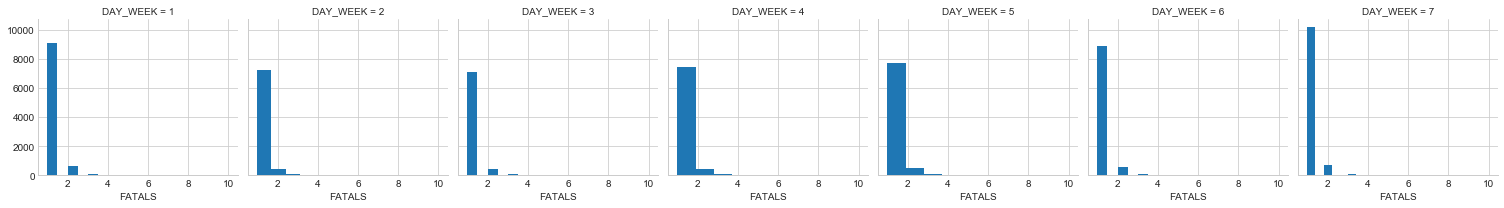

In [165]:
## Seaborn offers a powerful tool called FacetGrid for making small multiples of matplotlib graphs:

### Create an empty set of grids:
facet_histograms = sns.FacetGrid(acc, col='DAY_WEEK')

## "map' a histogram to each grid:
facet_histograms = facet_histograms.map(plt.hist, 'FATALS')

## Data Sourcing:
plt.show()

In [166]:
## Simple Aggregation
agg2 = acc.groupby(['StateName','YEAR'])['FATALS'].sum().reset_index()
agg2.head(10)

,StateName,YEAR,FATALS
0,Alabama,2014,820
1,Alabama,2015,849
2,Alaska,2014,73
3,Alaska,2015,65
4,Arizona,2014,773
5,Arizona,2015,891
6,Arkansas,2014,466
7,Arkansas,2015,526
8,California,2014,3102
9,California,2015,3176


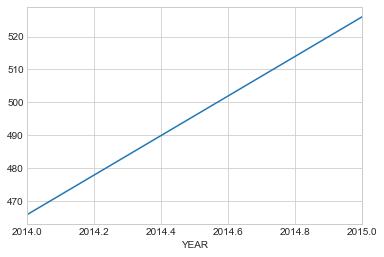

In [167]:
## Easy line chart in seaborn: 
agg_lim = agg2[agg2["StateName"] == "Arkansas"]
sns.tsplot(data=agg_lim['FATALS'], time=agg_lim['YEAR'])

## Quiz:
Can you make a grid of small multiple line charts or scatterplots?

## Visual Encodings

We often start with charts that use 2-dimensional position (like a scatterplot) or that use height (like histograms and bar charts). This is because these visual encodings - the visible mark that represents the data - are particularly perceptually strong. This means that when humans view these visual encodings, they are more accurate in estimating the underlying numbers than encodings like size (think circle size in a bubble chart) or angle (e.g. pie chart).

For more information on visual encodings and data visualization theory, see:

* [Designing Data Visualizations, Chapter 4](http://www.safaribooksonline.com/library/view/designing-data-visualizations/9781449314774/ch04.html) by Julie Steele and Noah Iliinsky

* Now You See It - book by Stephen Few

In [168]:
agg2

,StateName,YEAR,FATALS
0,Alabama,2014,820
1,Alabama,2015,849
2,Alaska,2014,73
3,Alaska,2015,65
4,Arizona,2014,773
5,Arizona,2015,891
6,Arkansas,2014,466
7,Arkansas,2015,526
8,California,2014,3102
9,California,2015,3176


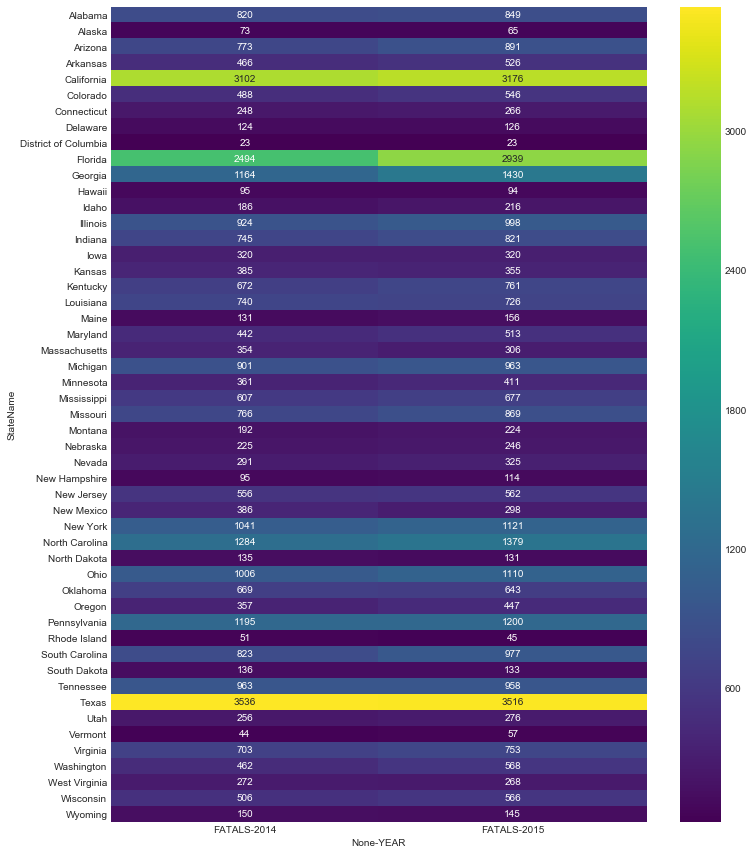

In [171]:
### Reading Documentation and Learning New Charts - Heatmap
## Knowing the  expected data format is important!
## Heatmap requires a reformat to wide formatted data

agg2_wide = agg2.pivot("StateName", "YEAR")


plt.figure(figsize=(12, 15))
sns.heatmap(agg2_wide, annot=True, fmt='g', cmap="viridis")
plt.show()

#### More information:
* [seaborn heatmap documentation](http://seaborn.pydata.org/generated/seaborn.heatmap.html)
* [matplotlib color map documentation](http://matplotlib.org/users/colormap.html)

## Next Steps:
    
Check out the seaborn [data visualization gallery](http://seaborn.pydata.org/examples) and see if you can implement an interesting visualization.

## Learn More:

[A Dramatic Tour Through Pythons Data Visualization Landscape](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)